# Tutorial 71: Time Curves

This example demonstrates how to ...

# SIR 3S Installation

In [131]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S\SirGraf-90-15-00-20x64_Quebec-Upd1" #change to local path

# Imports

In [132]:
from sir3stoolkit.core import wrapper

In [133]:
from sir3stoolkit.mantle import mantle

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [134]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

## Additional imports

In [135]:
import os

In [136]:
import pandas as pd

...

# Initialization

In [137]:
s3s = mantle.SIR3S_Model_Mantle()

Initialization complete


# Open Model

In [138]:
dbFilePath=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example2.db3"

In [139]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Obtain Data

In [140]:
object_types = [item for item in dir(s3s.ObjectTypes) if not (item.startswith('__') and item.endswith('__'))]
print(object_types)

['AGSN_HydraulicProfile', 'AirVessel', 'Arrow', 'Atmosphere', 'BlockConnectionNode', 'CalcPari', 'CharacteristicLossTable', 'CharacteristicLossTable_Row', 'Circle', 'Compressor', 'CompressorTable', 'CompressorTable_Row', 'ControlEngineeringNexus', 'ControlMode', 'ControlPointTable', 'ControlPointTable_Row', 'ControlValve', 'ControlVariableConverter', 'ControlVariableConverterRSTE', 'CrossSectionTable', 'CrossSectionTable_Row', 'DPGR_DPKT_DatapointDpgrConnection', 'DPGR_DataPointGroup', 'DPKT_Datapoint', 'DamageRatesTable', 'DamageRatesTable_Row', 'DeadTimeElement', 'Demand', 'DifferentialRegulator', 'DirectionalArrow', 'DistrictHeatingConsumer', 'DistrictHeatingFeeder', 'Divider', 'DriveEfficiencyTable', 'DriveEfficiencyTable_Row', 'DrivePowerTable', 'DrivePowerTable_Row', 'EBES_FeederGroups', 'EfficiencyConverterTable', 'EfficiencyConverterTable_Row', 'ElementQuery', 'EnergyRecoveryTable', 'EnergyRecoveryTable_Row', 'EnvironmentTemp', 'FWBZ_DistrictHeatingReferenceValues', 'FlapValve'

## Nodes

In [141]:
nodes_tks = ["5471942051669438823", "5166327497394449628", "5667818255300782920", "5262999985134416180"]

In [ ]:
df_nodes_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.Node
                                                          ,tks=nodes_tks
                                                          ,properties=["PH"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-01-16 12:29:48,542] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Node
[2026-01-16 12:29:48,543] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-01-16 12:29:48,616] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-01-16 12:29:48,676] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-01-16 12:29:48,676] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 635 element(s) of element type ObjectTypes.Node.
[2026-01-16 12:29:48,676] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 4 tks remain after filtering for given tks.
[2026-01-16 12:29:48,680] INFO in sir3stoolkit.mantle.dataframes: [results] Using 2 result properties.
[2026-01-16 12:29:48,690] INFO in sir3stoo

## Vents

In [186]:
vent_tks = ["5303247238968995258"]

In [187]:
df_vent_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.FlapValve
                                                          ,tks=vent_tks
                                                          ,properties=["PHI", "QM"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-01-16 12:56:05,595] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.FlapValve
[2026-01-16 12:56:05,596] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-01-16 12:56:05,666] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-01-16 12:56:05,732] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-01-16 12:56:05,733] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 4 element(s) of element type ObjectTypes.FlapValve.
[2026-01-16 12:56:05,734] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 1 tks remain after filtering for given tks.
[2026-01-16 12:56:05,736] INFO in sir3stoolkit.mantle.dataframes: [results] Using 2 result properties.
[2026-01-16 12:56:05,749] INFO in 

In [188]:
df_vent_results.head(3)

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        
name                                      
end_nodes                                 
property                              QM  
timestamp                                 
2020-01-28 15:45:01.000 +01:00  18.35320  
2020-01-28 15:45:01.100 +01:00  18.35296  
2020-01-28 15:45:01.200 +01:00  18.35280

## Valves

In [179]:
valves_tks = ["5430537691154258843"]

In [182]:
df_valves_results = s3s.generate_element_results_dataframe(element_type=s3s.ObjectTypes.Valve
                                                          ,tks=valves_tks
                                                          ,properties=["QM"]
                                                          ,timestamps=None # all available simulation timestamps will be used
                                                          )

[2026-01-16 12:55:33,731] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results dataframe for element type: ObjectTypes.Valve
[2026-01-16 12:55:33,732] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] No timestamps were given. Checking available simulation timestamps (SIR3S_Model.GetTimeStamps()[0]).
[2026-01-16 12:55:33,798] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 simulation timestamp(s) are available.
[2026-01-16 12:55:33,863] INFO in sir3stoolkit.mantle.dataframes: [Resolving Timestamps] 601 valid timestamp(s) will be used.
[2026-01-16 12:55:33,864] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] Retrieved 9 element(s) of element type ObjectTypes.Valve.
[2026-01-16 12:55:33,865] INFO in sir3stoolkit.mantle.dataframes: [Resolving tks] 1 tks remain after filtering for given tks.
[2026-01-16 12:55:33,867] INFO in sir3stoolkit.mantle.dataframes: [results] Using 1 result properties.
[2026-01-16 12:55:33,874] INFO in sir3stoo

In [183]:
df_valves_results.head(3)

tk,5430537691154258843
name,Ventil K0011 PST_out
end_nodes,"('5471942051669438823', '5355079936656060238', '-1', '-1')"
property,QM
timestamp,
2020-01-28 15:45:01.000 +01:00,36.70272
2020-01-28 15:45:01.100 +01:00,36.70224
2020-01-28 15:45:01.200 +01:00,36.70192


## Concat

In [189]:
df_results = pd.concat([df_nodes_results, df_vent_results, df_valves_results], axis=1, join="inner")

In [191]:
df_results.head(3)

tk                                      5471942051669438823       \
name                                                  K0011        
end_nodes                      No end nodes on element type        
property                                                 PH   QM   
timestamp                                                          
2020-01-28 15:45:01.000 +01:00                     10.59964  0.0   
2020-01-28 15:45:01.100 +01:00                     10.59981  0.0   
2020-01-28 15:45:01.200 +01:00                     10.59993  0.0   

tk                                      5166327497394449628            \
name                                              5143521_i             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     8.320659 -0.000006   
2020-01-28 15:45:01.100 +01:00                     8.320658 -0.000006   
2020-01-28 15:45:01.200 +01:00                     8.320656 -0.000006   

tk                                      5667818255300782920            \
name                                             791393_3_k             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     6.477164 -0.000006   
2020-01-28 15:45:01.100 +01:00                     6.477123 -0.000006   
2020-01-28 15:45:01.200 +01:00                     6.477080 -0.000006   

tk                                      5262999985134416180            \
name                                            1629686_0_i             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     0.881641 -0.000003   
2020-01-28 15:45:01.100 +01:00                     0.881641 -0.000003   
2020-01-28 15:45:01.200 +01:00                     0.881639 -0.000003   

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        \
name                                       
end_nodes                                  
property                              QM   
timestamp                                  
2020-01-28 15:45:01.000 +01:00  18.35320   
2020-01-28 15:45:01.100 +01:00  18.35296   
2020-01-28 15:45:01.200 +01:00  18.35280   

tk                                                                    5430537691154258843  
name                                                                 Ventil K0011 PST_out  
end_nodes                      ('5471942051669438823', '5355079936656060238', '-1', '-1')  
property                                                                               QM  
timestamp                                                                                  
2020-01-28 15:45:01.000 +01:00                                           36.70272          
2020-01-28 15:45:01.100 +01:00                    

# Plot

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from collections import OrderedDict


def plot_properties_multi_axis_allow_missing(
    df: pd.DataFrame,
    start=None,
    end=None,
    properties=None,
    axis_labels=None,
    ylims=None,
    tks_per_property=None,
    y_label_ticks=None,
    y_grid_ticks=None,
    x_label_ticks=None,
    x_grid_ticks=None,
    figsize=(20, 14),
    axis_offset=60,
    linestyles=None,
    legend=True,
    legend_fontsize=8,
    legend_loc="upper right",
    legend_coords=(0.67, 0.33),
    legend_in_figure=True,
    missing="skip",
    normalize=str.upper,
    aliases=None,
    title_prefix="",
    show_title=True,
    rotate_xticks=0,
    grid=True,
    grid_style="--",
    grid_alpha=0.3,
    logger=None,
):
    """
    Plot multiple properties using multiple y-axes (all on the left). Properties do not need to exist for all TK groups.
    Optionally restrict which TKs are plotted for each property.

    Legend labels are "PROPERTY NAME" (no TK).

    Tick/grid separation:
    - Labeled ticks come from major ticks (x_label_ticks, y_label_ticks)
    - Grid lines come from minor ticks (x_grid_ticks, y_grid_ticks)
    - Horizontal grid is based on the first y-axis (axis 0)

    :param df: Input DataFrame with MultiIndex columns. Level 0 must represent TK/group; last level must represent property.
               A column level named "name" is used for legend labels if present.
    :type df: pandas.DataFrame
    :param start: Start timestamp (inclusive) for slicing and x-axis limits. If None, uses first timestamp in df.
    :type start: Any
    :param end: End timestamp (inclusive) for slicing and x-axis limits. If None, uses last timestamp in df.
    :type end: Any
    :param properties: List of property names to plot (matched against the last MultiIndex level). If None, plots all properties found.
    :type properties: list[str] | None
    :param axis_labels: List of y-axis labels corresponding to properties. If None, uses "property=<name>".
    :type axis_labels: list[str] | None
    :param ylims: List of y-limits tuples per property axis, e.g. [(0, 12), (0, 40), (0, 60)]. Use None entries to keep autoscale.
    :type ylims: list[tuple[float, float] | None] | None
    :param tks_per_property: List of lists/sets of TKs allowed per property. If an entry is None or empty, all TKs are allowed.
    :type tks_per_property: list[list[str] | set[str] | None] | None
    :param y_label_ticks: Number of labeled y-ticks per axis (one int per property/axis). If None, leaves default tick behavior.
    :type y_label_ticks: list[int] | None
    :param y_grid_ticks: Number of horizontal grid lines (minor y-ticks) based on the first y-axis. If None, no minor y-grid control.
    :type y_grid_ticks: int | None
    :param x_label_ticks: Number of labeled x-ticks (major ticks). If None, uses AutoDateLocator for major ticks.
    :type x_label_ticks: int | None
    :param x_grid_ticks: Number of vertical grid lines (minor x-ticks). If None, no minor x-grid control.
    :type x_grid_ticks: int | None
    :param figsize: Matplotlib figure size.
    :type figsize: tuple[int, int]
    :param axis_offset: Outward offset (in points) between stacked left-side y-axes.
    :type axis_offset: int
    :param linestyles: List of linestyles used per property (cycled if shorter than properties). Default cycles ["-","--",":","-."].
    :type linestyles: list[str] | None
    :param legend: Whether to draw a legend.
    :type legend: bool
    :param legend_fontsize: Legend font size.
    :type legend_fontsize: int | float
    :param legend_loc: Legend location argument passed to matplotlib (e.g. "upper left").
    :type legend_loc: str
    :param legend_coords: Legend anchor coordinates passed as bbox_to_anchor.
    :type legend_coords: tuple[float, float]
    :param legend_in_figure: If True, uses fig.legend(...) (more robust for multiple twinx axes). If False, uses ax0.legend(...).
    :type legend_in_figure: bool
    :param missing: Policy if a requested property yields no plotted lines after filtering: "skip", "warn", or "error".
    :type missing: str
    :param normalize: Function applied to property strings for robust matching (e.g. str.upper).
    :type normalize: callable
    :param aliases: Mapping applied after normalization to unify names (e.g. {"PHI": "PH"}). Keys/values must be normalized form.
    :type aliases: dict[str, str] | None
    :param title_prefix: Optional text prepended to the timeframe title.
    :type title_prefix: str
    :param show_title: If True, sets a title containing the selected timeframe.
    :type show_title: bool
    :param rotate_xticks: Rotation angle (degrees) for x tick labels.
    :type rotate_xticks: int | float
    :param grid: Whether to draw grid lines (on base axis).
    :type grid: bool
    :param grid_style: Line style for grid.
    :type grid_style: str
    :param grid_alpha: Alpha for grid lines.
    :type grid_alpha: float
    :param logger: Optional logger with .info/.warning methods. If provided, logs are prefixed with "[time curves]".
    :type logger: Any
    :return: (fig, axes, used_properties) where axes is a list of axes (one per property), and used_properties are normalized properties used.
    :rtype: tuple[matplotlib.figure.Figure, list[matplotlib.axes.Axes], list[str]]
    """

    # -------------------------------------------------------------------------
    # Logging helpers (all messages prefixed as requested)
    # -------------------------------------------------------------------------
    def _log_info(msg: str) -> None:
        if logger is not None:
            logger.info(f"[time curves] {msg}")

    def _log_warn(msg: str) -> None:
        if logger is not None and hasattr(logger, "warning"):
            logger.warning(f"[time curves] {msg}")
        elif logger is not None:
            logger.info(f"[time curves] {msg}")

    # -------------------------------------------------------------------------
    # Input validation + index normalization
    # -------------------------------------------------------------------------
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame must have MultiIndex columns.")

    df = df.copy()

    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            raise ValueError("Index must be convertible to DateTimeIndex.") from e

    # -------------------------------------------------------------------------
    # Time-window slicing and exact x-limits
    # -------------------------------------------------------------------------
    start_ts = pd.to_datetime(start) if start is not None else None
    end_ts = pd.to_datetime(end) if end is not None else None

    if start_ts is not None or end_ts is not None:
        df = df.loc[start_ts:end_ts]

    if df.empty:
        raise ValueError("No data available in the requested start/end window.")

    x_start = start_ts if start_ts is not None else df.index.min()
    x_end = end_ts if end_ts is not None else df.index.max()
    if x_start > x_end:
        raise ValueError("start must be <= end.")

    _log_info(f"Plot window: {x_start} .. {x_end} (rows={len(df)})")

    # -------------------------------------------------------------------------
    # Column level names and property normalization
    # -------------------------------------------------------------------------
    top_level_name = df.columns.names[0] or "TK"
    last_level_name = df.columns.names[-1] or "property"
    index_label = df.index.name or "time"

    def norm_prop(s: str) -> str:
        s2 = normalize(str(s)).strip()
        if aliases:
            s2 = aliases.get(s2, s2)
        return s2

    raw_last = df.columns.get_level_values(-1).astype(str)
    df_last_norm = raw_last.map(norm_prop)

    if properties is None:
        used_properties = sorted(set(df_last_norm))
    else:
        used_properties = [norm_prop(p) for p in properties]

    n_props = len(used_properties)
    if n_props == 0:
        raise ValueError("No properties to plot.")

    # -------------------------------------------------------------------------
    # Axis labels and limits
    # -------------------------------------------------------------------------
    if axis_labels is None:
        used_axis_labels = [f"{last_level_name}={p}" for p in used_properties]
    else:
        if len(axis_labels) != n_props:
            raise ValueError("axis_labels must have same length as properties.")
        used_axis_labels = list(axis_labels)

    if ylims is not None:
        if len(ylims) != n_props:
            raise ValueError("ylims must have same length as properties (or be None).")
        for lim in ylims:
            if lim is not None and (not isinstance(lim, (tuple, list)) or len(lim) != 2):
                raise ValueError("Each ylims entry must be (ymin, ymax) or None.")

    # -------------------------------------------------------------------------
    # Per-property TK allow-lists
    # -------------------------------------------------------------------------
    if tks_per_property is not None:
        if len(tks_per_property) != n_props:
            raise ValueError("tks_per_property must have same length as properties (or be None).")
        allowed_tks_sets = []
        for allow in tks_per_property:
            if allow is None:
                allowed_tks_sets.append(None)
            else:
                allow_list = [str(x).strip() for x in allow]
                allowed_tks_sets.append(set(allow_list) if len(allow_list) > 0 else None)
    else:
        allowed_tks_sets = [None] * n_props

    # -------------------------------------------------------------------------
    # Tick parameters validation
    # -------------------------------------------------------------------------
    if y_label_ticks is not None:
        if len(y_label_ticks) != n_props:
            raise ValueError("y_label_ticks must have same length as properties (or be None).")
        if any((not isinstance(n, int) or n < 2) for n in y_label_ticks):
            raise ValueError("Each y_label_ticks entry must be an int >= 2.")

    if y_grid_ticks is not None and (not isinstance(y_grid_ticks, int) or y_grid_ticks < 2):
        raise ValueError("y_grid_ticks must be an int >= 2 (or None).")

    if x_label_ticks is not None and (not isinstance(x_label_ticks, int) or x_label_ticks < 2):
        raise ValueError("x_label_ticks must be an int >= 2 (or None).")

    if x_grid_ticks is not None and (not isinstance(x_grid_ticks, int) or x_grid_ticks < 2):
        raise ValueError("x_grid_ticks must be an int >= 2 (or None).")

    # -------------------------------------------------------------------------
    # Line styling per property
    # -------------------------------------------------------------------------
    if linestyles is None:
        linestyles = ["-", "--", ":", "-."]
    prop_linestyle = {p: linestyles[i % len(linestyles)] for i, p in enumerate(used_properties)}

    # -------------------------------------------------------------------------
    # Create figure and stacked left-side y-axes
    # -------------------------------------------------------------------------
    fig, ax0 = plt.subplots(figsize=figsize)
    axes = [ax0]
    for i in range(1, n_props):
        ax = ax0.twinx()
        ax.yaxis.set_label_position("left")
        ax.yaxis.tick_left()
        ax.spines["left"].set_position(("outward", axis_offset * i))
        ax.spines["right"].set_visible(False)
        axes.append(ax)

    # Exact x-limits, no padding, for all axes
    for ax in axes:
        ax.set_xlim(x_start, x_end)
        ax.margins(x=0)
        ax.autoscale(enable=False, axis="x")

    # -------------------------------------------------------------------------
    # X tick formatting (show time for short spans) + label/grid tick placement
    # -------------------------------------------------------------------------
    span = pd.Timestamp(x_end) - pd.Timestamp(x_start)
    if span <= pd.Timedelta("1D"):
        x_fmt = "%H:%M:%S"
    elif span <= pd.Timedelta("7D"):
        x_fmt = "%m-%d %H:%M"
    else:
        x_fmt = "%Y-%m-%d"

    ax0.xaxis.set_major_formatter(mdates.DateFormatter(x_fmt))

    x0_num = mdates.date2num(pd.Timestamp(x_start).to_pydatetime())
    x1_num = mdates.date2num(pd.Timestamp(x_end).to_pydatetime())

    # Major x ticks determine labels
    if x_label_ticks is not None:
        major_xticks = np.linspace(x0_num, x1_num, x_label_ticks)
        ax0.xaxis.set_major_locator(mticker.FixedLocator(major_xticks))
    else:
        locator = mdates.AutoDateLocator(minticks=3, maxticks=8)
        ax0.xaxis.set_major_locator(locator)
        # ensure x_start is labeled
        current = list(ax0.get_xticks())
        ax0.set_xticks(sorted(set(current + [x0_num])))

    # Minor x ticks determine vertical grid lines
    if x_grid_ticks is not None:
        minor_xticks = np.linspace(x0_num, x1_num, x_grid_ticks)
        ax0.xaxis.set_minor_locator(mticker.FixedLocator(minor_xticks))

    if rotate_xticks:
        for lbl in ax0.get_xticklabels():
            lbl.set_rotation(rotate_xticks)
            lbl.set_ha("right")

    # -------------------------------------------------------------------------
    # Determine TK groups (level 0), colors per TK, and find "name" level index
    # -------------------------------------------------------------------------
    lvl0_str = df.columns.get_level_values(0).astype(str).map(str.strip)
    top_groups = lvl0_str.unique().tolist()

    colors = plt.rcParams["axes.prop_cycle"].by_key().get("color", [])
    if not colors:
        colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
    group_color = {g: colors[i % len(colors)] for i, g in enumerate(top_groups)}

    col_names = list(df.columns.names)
    name_level_idx = col_names.index("name") if "name" in col_names else None

    # Strict: each (TK, property) must resolve to exactly one column
    def pick_single_series(frame: pd.DataFrame) -> pd.Series:
        if frame.shape[1] == 1:
            return frame.iloc[:, 0]
        raise ValueError(
            f"Expected exactly 1 column for a given (TK, property), but got {frame.shape[1]}. "
            f"Columns: {list(frame.columns)}"
        )

    # -------------------------------------------------------------------------
    # Plot lines: only if property exists AND TK is allowed for that property
    # Legend label: "PROPERTY NAME" (no TK)
    # -------------------------------------------------------------------------
    all_lines = []
    plotted_any_for_property = {p: False for p in used_properties}

    for prop_idx, prop in enumerate(used_properties):
        ax = axes[prop_idx]
        ls = prop_linestyle[prop]
        allowed_tks = allowed_tks_sets[prop_idx]

        for g in top_groups:
            if allowed_tks is not None and g not in allowed_tks:
                continue

            mask = (lvl0_str == g) & (df_last_norm == prop)
            cols = df.columns[mask]
            if len(cols) == 0:
                continue

            series = pick_single_series(df.loc[:, cols])

            # Extract element name from "name" level (fallback to TK if missing)
            if name_level_idx is not None:
                name_vals = df.columns.get_level_values(name_level_idx)[mask]
                name_val = str(pd.unique(name_vals)[0]) if len(name_vals) else str(g)
            else:
                name_val = str(g)

            line_label = f"{prop} {name_val}".strip()

            (ln,) = ax.plot(
                df.index,
                series,
                linestyle=ls,
                color=group_color[g],
                label=line_label,
            )

            all_lines.append(ln)
            plotted_any_for_property[prop] = True

        ax.set_ylabel(used_axis_labels[prop_idx])

        if ylims is not None and ylims[prop_idx] is not None:
            ax.set_ylim(*ylims[prop_idx])

    # -------------------------------------------------------------------------
    # Missing property handling (property yields no plotted lines)
    # -------------------------------------------------------------------------
    missing_props = [p for p, ok in plotted_any_for_property.items() if not ok]
    if missing_props:
        msg = f"Requested properties produced no plotted lines (missing or filtered out): {missing_props}"
        if missing == "error":
            raise ValueError(msg)
        elif missing == "warn":
            _log_warn(msg)

    # -------------------------------------------------------------------------
    # Y tick labels per axis (major ticks) and y-grid ticks (minor ticks on axis 0)
    # -------------------------------------------------------------------------
    for prop_idx, ax in enumerate(axes):
        if y_label_ticks is not None:
            y0, y1 = ax.get_ylim()
            major_yticks = np.linspace(y0, y1, y_label_ticks[prop_idx])
            ax.set_yticks(major_yticks)

    if y_grid_ticks is not None:
        y0, y1 = ax0.get_ylim()
        minor_yticks = np.linspace(y0, y1, y_grid_ticks)
        ax0.yaxis.set_minor_locator(mticker.FixedLocator(minor_yticks))

    # -------------------------------------------------------------------------
    # Labels, grid, title, legend
    # -------------------------------------------------------------------------
    ax0.set_xlabel(index_label)
    ax0.set_axisbelow(True)

    if grid:
        ax0.grid(True, which="major", axis="both", linestyle=grid_style, alpha=grid_alpha)
        if x_grid_ticks is not None:
            ax0.grid(True, which="minor", axis="x", linestyle=grid_style, alpha=grid_alpha)
        if y_grid_ticks is not None:
            ax0.grid(True, which="minor", axis="y", linestyle=grid_style, alpha=grid_alpha)

    if show_title:
        s = pd.Timestamp(x_start)
        e = pd.Timestamp(x_end)
        if s.date() == e.date():
            title = f"{title_prefix}{s:%Y-%m-%d}  {s:%H:%M:%S} – {e:%H:%M:%S}"
        else:
            title = f"{title_prefix}{s:%Y-%m-%d %H:%M:%S} – {e:%Y-%m-%d %H:%M:%S}"
        ax0.set_title(title)

    if legend and all_lines:
        # De-duplicate while preserving order (helps when multiple lines would match same label)
        by_label = OrderedDict()
        for ln in all_lines:
            lab = ln.get_label()
            if lab not in by_label:
                by_label[lab] = ln

        handles = list(by_label.values())
        labels = list(by_label.keys())

        if legend_in_figure:
            fig.legend(handles, labels, loc=legend_loc, bbox_to_anchor=legend_coords, fontsize=legend_fontsize)
        else:
            ax0.legend(handles, labels, loc=legend_loc, bbox_to_anchor=legend_coords, fontsize=legend_fontsize)

    fig.tight_layout()
    _log_info(f"Plotted {len(all_lines)} lines for {n_props} properties.")
    return fig, axes, used_properties


In [247]:
df_results.head(3)

tk                                      5471942051669438823       \
name                                                  K0011        
end_nodes                      No end nodes on element type        
property                                                 PH   QM   
timestamp                                                          
2020-01-28 15:45:01.000 +01:00                     10.59964  0.0   
2020-01-28 15:45:01.100 +01:00                     10.59981  0.0   
2020-01-28 15:45:01.200 +01:00                     10.59993  0.0   

tk                                      5166327497394449628            \
name                                              5143521_i             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     8.320659 -0.000006   
2020-01-28 15:45:01.100 +01:00                     8.320658 -0.000006   
2020-01-28 15:45:01.200 +01:00                     8.320656 -0.000006   

tk                                      5667818255300782920            \
name                                             791393_3_k             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     6.477164 -0.000006   
2020-01-28 15:45:01.100 +01:00                     6.477123 -0.000006   
2020-01-28 15:45:01.200 +01:00                     6.477080 -0.000006   

tk                                      5262999985134416180            \
name                                            1629686_0_i             
end_nodes                      No end nodes on element type             
property                                                 PH        QM   
timestamp                                                               
2020-01-28 15:45:01.000 +01:00                     0.881641 -0.000003   
2020-01-28 15:45:01.100 +01:00                     0.881641 -0.000003   
2020-01-28 15:45:01.200 +01:00                     0.881639 -0.000003   

tk                                                                    5303247238968995258  \
name                                                                   Klappe K0013 K0014   
end_nodes                      ('5154852831768145370', '5018980228933582263', '-1', '-1')   
property                                                                              PHI   
timestamp                                                                                   
2020-01-28 15:45:01.000 +01:00                                           56.41736           
2020-01-28 15:45:01.100 +01:00                                           56.40917           
2020-01-28 15:45:01.200 +01:00                                           56.40861           

tk                                        \
name                                       
end_nodes                                  
property                              QM   
timestamp                                  
2020-01-28 15:45:01.000 +01:00  18.35320   
2020-01-28 15:45:01.100 +01:00  18.35296   
2020-01-28 15:45:01.200 +01:00  18.35280   

tk                                                                    5430537691154258843  
name                                                                 Ventil K0011 PST_out  
end_nodes                      ('5471942051669438823', '5355079936656060238', '-1', '-1')  
property                                                                               QM  
timestamp                                                                                  
2020-01-28 15:45:01.000 +01:00                                           36.70272          
2020-01-28 15:45:01.100 +01:00                    

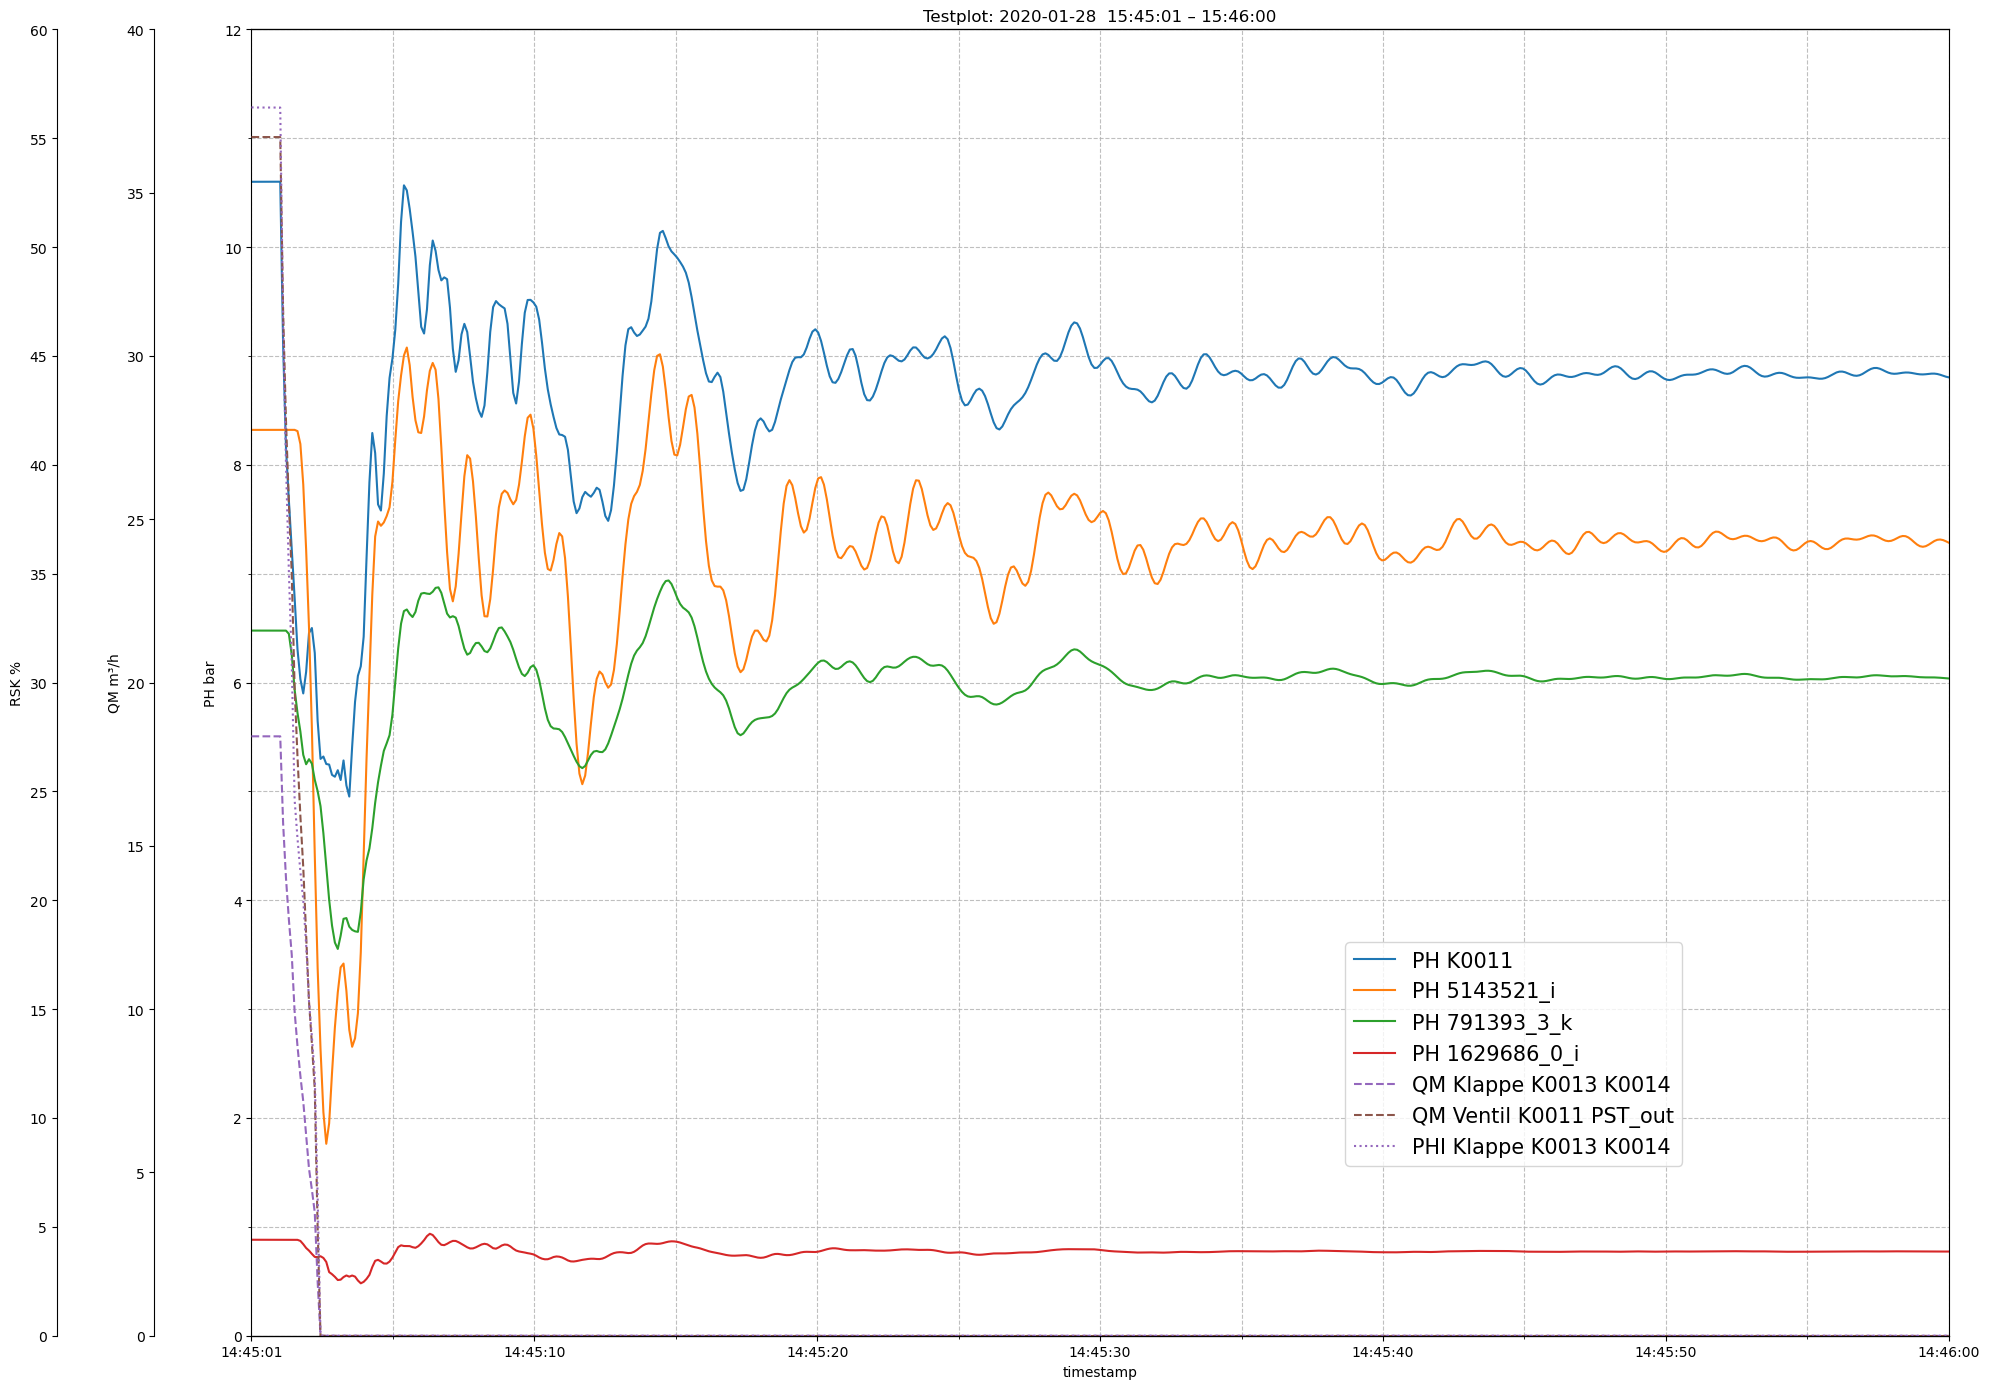

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from collections import OrderedDict


def plot_properties_multi_axis_allow_missing(
    df: pd.DataFrame,
    start=None,
    end=None,
    properties=None,
    axis_labels=None,
    ylims=None,
    tks_per_property=None,
    y_label_ticks=None,
    y_grid_ticks=None,
    x_label_ticks=None,
    x_grid_ticks=None,
    figsize=(20, 14),
    axis_offset=60,
    linestyles=None,
    legend=True,
    legend_fontsize=8,
    legend_loc="upper right",
    legend_coords=(0.67, 0.33),
    legend_in_figure=True,
    missing="skip",
    normalize=str.upper,
    aliases=None,
    title_prefix="",
    show_title=True,
    rotate_xticks=0,
    grid=True,
    grid_style="--",
    grid_alpha=0.3,
    logger=None,
):
    """
    Plot multiple properties using multiple y-axes (all on the left). Properties do not need to exist for all TK groups.
    Optionally restrict which TKs are plotted for each property.

    Legend labels are "PROPERTY NAME" (no TK).

    Tick/grid separation:
    - Labeled ticks come from major ticks (x_label_ticks, y_label_ticks)
    - Grid lines come from minor ticks (x_grid_ticks, y_grid_ticks)
    - Horizontal grid is based on the first y-axis (axis 0)

    :param df: Input DataFrame with MultiIndex columns. Level 0 must represent TK/group; last level must represent property.
               A column level named "name" is used for legend labels if present.
    :type df: pandas.DataFrame
    :param start: Start timestamp (inclusive) for slicing and x-axis limits. If None, uses first timestamp in df.
    :type start: Any
    :param end: End timestamp (inclusive) for slicing and x-axis limits. If None, uses last timestamp in df.
    :type end: Any
    :param properties: List of property names to plot (matched against the last MultiIndex level). If None, plots all properties found.
    :type properties: list[str] | None
    :param axis_labels: List of y-axis labels corresponding to properties. If None, uses "property=<name>".
    :type axis_labels: list[str] | None
    :param ylims: List of y-limits tuples per property axis, e.g. [(0, 12), (0, 40), (0, 60)]. Use None entries to keep autoscale.
    :type ylims: list[tuple[float, float] | None] | None
    :param tks_per_property: List of lists/sets of TKs allowed per property. If an entry is None or empty, all TKs are allowed.
    :type tks_per_property: list[list[str] | set[str] | None] | None
    :param y_label_ticks: Number of labeled y-ticks per axis (one int per property/axis). If None, leaves default tick behavior.
    :type y_label_ticks: list[int] | None
    :param y_grid_ticks: Number of horizontal grid lines (minor y-ticks) based on the first y-axis. If None, no minor y-grid control.
    :type y_grid_ticks: int | None
    :param x_label_ticks: Number of labeled x-ticks (major ticks). If None, uses AutoDateLocator for major ticks.
    :type x_label_ticks: int | None
    :param x_grid_ticks: Number of vertical grid lines (minor x-ticks). If None, no minor x-grid control.
    :type x_grid_ticks: int | None
    :param figsize: Matplotlib figure size.
    :type figsize: tuple[int, int]
    :param axis_offset: Outward offset (in points) between stacked left-side y-axes.
    :type axis_offset: int
    :param linestyles: List of linestyles used per property (cycled if shorter than properties). Default cycles ["-","--",":","-."].
    :type linestyles: list[str] | None
    :param legend: Whether to draw a legend.
    :type legend: bool
    :param legend_fontsize: Legend font size.
    :type legend_fontsize: int | float
    :param legend_loc: Legend location argument passed to matplotlib (e.g. "upper left").
    :type legend_loc: str
    :param legend_coords: Legend anchor coordinates passed as bbox_to_anchor.
    :type legend_coords: tuple[float, float]
    :param legend_in_figure: If True, uses fig.legend(...) (more robust for multiple twinx axes). If False, uses ax0.legend(...).
    :type legend_in_figure: bool
    :param missing: Policy if a requested property yields no plotted lines after filtering: "skip", "warn", or "error".
    :type missing: str
    :param normalize: Function applied to property strings for robust matching (e.g. str.upper).
    :type normalize: callable
    :param aliases: Mapping applied after normalization to unify names (e.g. {"PHI": "PH"}). Keys/values must be normalized form.
    :type aliases: dict[str, str] | None
    :param title_prefix: Optional text prepended to the timeframe title.
    :type title_prefix: str
    :param show_title: If True, sets a title containing the selected timeframe.
    :type show_title: bool
    :param rotate_xticks: Rotation angle (degrees) for x tick labels.
    :type rotate_xticks: int | float
    :param grid: Whether to draw grid lines (on base axis).
    :type grid: bool
    :param grid_style: Line style for grid.
    :type grid_style: str
    :param grid_alpha: Alpha for grid lines.
    :type grid_alpha: float
    :param logger: Optional logger with .info/.warning methods. If provided, logs are prefixed with "[time curves]".
    :type logger: Any
    :return: (fig, axes, used_properties) where axes is a list of axes (one per property), and used_properties are normalized properties used.
    :rtype: tuple[matplotlib.figure.Figure, list[matplotlib.axes.Axes], list[str]]
    """

    # -------------------------------------------------------------------------
    # Logging helpers
    # -------------------------------------------------------------------------
    def _log_info(msg: str) -> None:
        if logger is not None:
            logger.info(f"[time curves] {msg}")

    def _log_warn(msg: str) -> None:
        if logger is not None and hasattr(logger, "warning"):
            logger.warning(f"[time curves] {msg}")
        elif logger is not None:
            logger.info(f"[time curves] {msg}")

    # -------------------------------------------------------------------------
    # Input validation + index normalization
    # -------------------------------------------------------------------------
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame must have MultiIndex columns.")

    df = df.copy()

    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            raise ValueError("Index must be convertible to DateTimeIndex.") from e

    # -------------------------------------------------------------------------
    # Time-window slicing and exact x-limits
    # -------------------------------------------------------------------------
    start_ts = pd.to_datetime(start) if start is not None else None
    end_ts = pd.to_datetime(end) if end is not None else None

    if start_ts is not None or end_ts is not None:
        df = df.loc[start_ts:end_ts]

    if df.empty:
        raise ValueError("No data available in the requested start/end window.")

    x_start = start_ts if start_ts is not None else df.index.min()
    x_end = end_ts if end_ts is not None else df.index.max()
    if x_start > x_end:
        raise ValueError("start must be <= end.")

    _log_info(f"Plot window: {x_start} .. {x_end} (rows={len(df)})")

    # -------------------------------------------------------------------------
    # Column level names and property normalization
    # -------------------------------------------------------------------------
    top_level_name = df.columns.names[0] or "TK"
    last_level_name = df.columns.names[-1] or "property"
    index_label = df.index.name or "time"

    def norm_prop(s: str) -> str:
        s2 = normalize(str(s)).strip()
        if aliases:
            s2 = aliases.get(s2, s2)
        return s2

    raw_last = df.columns.get_level_values(-1).astype(str)
    df_last_norm = raw_last.map(norm_prop)

    if properties is None:
        used_properties = sorted(set(df_last_norm))
    else:
        used_properties = [norm_prop(p) for p in properties]

    n_props = len(used_properties)
    if n_props == 0:
        raise ValueError("No properties to plot.")

    # -------------------------------------------------------------------------
    # Axis labels and limits
    # -------------------------------------------------------------------------
    if axis_labels is None:
        used_axis_labels = [f"{last_level_name}={p}" for p in used_properties]
    else:
        if len(axis_labels) != n_props:
            raise ValueError("axis_labels must have same length as properties.")
        used_axis_labels = list(axis_labels)

    if ylims is not None:
        if len(ylims) != n_props:
            raise ValueError("ylims must have same length as properties (or be None).")
        for lim in ylims:
            if lim is not None and (not isinstance(lim, (tuple, list)) or len(lim) != 2):
                raise ValueError("Each ylims entry must be (ymin, ymax) or None.")

    # -------------------------------------------------------------------------
    # Per-property TK allow-lists
    # -------------------------------------------------------------------------
    if tks_per_property is not None:
        if len(tks_per_property) != n_props:
            raise ValueError("tks_per_property must have same length as properties (or be None).")
        allowed_tks_sets = []
        for allow in tks_per_property:
            if allow is None:
                allowed_tks_sets.append(None)
            else:
                allow_list = [str(x).strip() for x in allow]
                allowed_tks_sets.append(set(allow_list) if len(allow_list) > 0 else None)
    else:
        allowed_tks_sets = [None] * n_props

    # -------------------------------------------------------------------------
    # Tick parameters validation
    # -------------------------------------------------------------------------
    if y_label_ticks is not None:
        if len(y_label_ticks) != n_props:
            raise ValueError("y_label_ticks must have same length as properties (or be None).")
        if any((not isinstance(n, int) or n < 2) for n in y_label_ticks):
            raise ValueError("Each y_label_ticks entry must be an int >= 2.")

    if y_grid_ticks is not None and (not isinstance(y_grid_ticks, int) or y_grid_ticks < 2):
        raise ValueError("y_grid_ticks must be an int >= 2 (or None).")

    if x_label_ticks is not None and (not isinstance(x_label_ticks, int) or x_label_ticks < 2):
        raise ValueError("x_label_ticks must be an int >= 2 (or None).")

    if x_grid_ticks is not None and (not isinstance(x_grid_ticks, int) or x_grid_ticks < 2):
        raise ValueError("x_grid_ticks must be an int >= 2 (or None).")

    # -------------------------------------------------------------------------
    # Line styling per property
    # -------------------------------------------------------------------------
    if linestyles is None:
        linestyles = ["-", "--", ":", "-."]
    prop_linestyle = {p: linestyles[i % len(linestyles)] for i, p in enumerate(used_properties)}

    # -------------------------------------------------------------------------
    # Create figure and stacked left-side y-axes
    # -------------------------------------------------------------------------
    fig, ax0 = plt.subplots(figsize=figsize)
    axes = [ax0]
    for i in range(1, n_props):
        ax = ax0.twinx()
        ax.yaxis.set_label_position("left")
        ax.yaxis.tick_left()
        ax.spines["left"].set_position(("outward", axis_offset * i))
        ax.spines["right"].set_visible(False)
        axes.append(ax)

    # Exact x-limits, no padding, for all axes
    for ax in axes:
        ax.set_xlim(x_start, x_end)
        ax.margins(x=0)
        ax.autoscale(enable=False, axis="x")

    # -------------------------------------------------------------------------
    # X tick formatting (show time for short spans) + label/grid tick placement
    # -------------------------------------------------------------------------
    span = pd.Timestamp(x_end) - pd.Timestamp(x_start)
    if span <= pd.Timedelta("1D"):
        x_fmt = "%H:%M:%S"
    elif span <= pd.Timedelta("7D"):
        x_fmt = "%m-%d %H:%M"
    else:
        x_fmt = "%Y-%m-%d"

    ax0.xaxis.set_major_formatter(mdates.DateFormatter(x_fmt))

    x0_num = mdates.date2num(pd.Timestamp(x_start).to_pydatetime())
    x1_num = mdates.date2num(pd.Timestamp(x_end).to_pydatetime())

    # Major x ticks determine labels
    if x_label_ticks is not None:
        major_xticks = np.linspace(x0_num, x1_num, x_label_ticks)
        ax0.xaxis.set_major_locator(mticker.FixedLocator(major_xticks))
    else:
        locator = mdates.AutoDateLocator(minticks=3, maxticks=8)
        ax0.xaxis.set_major_locator(locator)
        # ensure x_start is labeled
        current = list(ax0.get_xticks())
        ax0.set_xticks(sorted(set(current + [x0_num])))

    # Minor x ticks determine vertical grid lines
    if x_grid_ticks is not None:
        minor_xticks = np.linspace(x0_num, x1_num, x_grid_ticks)
        ax0.xaxis.set_minor_locator(mticker.FixedLocator(minor_xticks))

    if rotate_xticks:
        for lbl in ax0.get_xticklabels():
            lbl.set_rotation(rotate_xticks)
            lbl.set_ha("right")

    # -------------------------------------------------------------------------
    # Determine TK groups (level 0), colors per TK, and find "name" level index
    # -------------------------------------------------------------------------
    lvl0_str = df.columns.get_level_values(0).astype(str).map(str.strip)
    top_groups = lvl0_str.unique().tolist()

    colors = plt.rcParams["axes.prop_cycle"].by_key().get("color", [])
    if not colors:
        colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
    group_color = {g: colors[i % len(colors)] for i, g in enumerate(top_groups)}

    col_names = list(df.columns.names)
    name_level_idx = col_names.index("name") if "name" in col_names else None

    # Strict: each (TK, property) must resolve to exactly one column
    def pick_single_series(frame: pd.DataFrame) -> pd.Series:
        if frame.shape[1] == 1:
            return frame.iloc[:, 0]
        raise ValueError(
            f"Expected exactly 1 column for a given (TK, property), but got {frame.shape[1]}. "
            f"Columns: {list(frame.columns)}"
        )

    # -------------------------------------------------------------------------
    # Plot lines: only if property exists AND TK is allowed for that property
    # Legend label: "PROPERTY NAME" (no TK)
    # -------------------------------------------------------------------------
    all_lines = []
    plotted_any_for_property = {p: False for p in used_properties}

    for prop_idx, prop in enumerate(used_properties):
        ax = axes[prop_idx]
        ls = prop_linestyle[prop]
        allowed_tks = allowed_tks_sets[prop_idx]

        for g in top_groups:
            if allowed_tks is not None and g not in allowed_tks:
                continue

            mask = (lvl0_str == g) & (df_last_norm == prop)
            cols = df.columns[mask]
            if len(cols) == 0:
                continue

            series = pick_single_series(df.loc[:, cols])

            # Extract element name from "name" level (fallback to TK if missing)
            if name_level_idx is not None:
                name_vals = df.columns.get_level_values(name_level_idx)[mask]
                name_val = str(pd.unique(name_vals)[0]) if len(name_vals) else str(g)
            else:
                name_val = str(g)

            line_label = f"{prop} {name_val}".strip()

            (ln,) = ax.plot(
                df.index,
                series,
                linestyle=ls,
                color=group_color[g],
                label=line_label,
            )

            all_lines.append(ln)
            plotted_any_for_property[prop] = True

        ax.set_ylabel(used_axis_labels[prop_idx])

        if ylims is not None and ylims[prop_idx] is not None:
            ax.set_ylim(*ylims[prop_idx])

    # -------------------------------------------------------------------------
    # Missing property handling (property yields no plotted lines)
    # -------------------------------------------------------------------------
    missing_props = [p for p, ok in plotted_any_for_property.items() if not ok]
    if missing_props:
        msg = f"Requested properties produced no plotted lines (missing or filtered out): {missing_props}"
        if missing == "error":
            raise ValueError(msg)
        elif missing == "warn":
            _log_warn(msg)

    # -------------------------------------------------------------------------
    # Y tick labels per axis (major ticks) and y-grid ticks (minor ticks on axis 0)
    # -------------------------------------------------------------------------
    for prop_idx, ax in enumerate(axes):
        if y_label_ticks is not None:
            y0, y1 = ax.get_ylim()
            major_yticks = np.linspace(y0, y1, y_label_ticks[prop_idx])
            ax.set_yticks(major_yticks)

    if y_grid_ticks is not None:
        y0, y1 = ax0.get_ylim()
        minor_yticks = np.linspace(y0, y1, y_grid_ticks)
        ax0.yaxis.set_minor_locator(mticker.FixedLocator(minor_yticks))

    # -------------------------------------------------------------------------
    # Labels, grid, title, legend
    # -------------------------------------------------------------------------
    ax0.set_xlabel(index_label)
    ax0.set_axisbelow(True)

    if grid:
        ax0.grid(True, which="major", axis="both", linestyle=grid_style, alpha=grid_alpha)
        if x_grid_ticks is not None:
            ax0.grid(True, which="minor", axis="x", linestyle=grid_style, alpha=grid_alpha)
        if y_grid_ticks is not None:
            ax0.grid(True, which="minor", axis="y", linestyle=grid_style, alpha=grid_alpha)

    if show_title:
        s = pd.Timestamp(x_start)
        e = pd.Timestamp(x_end)
        if s.date() == e.date():
            title = f"{title_prefix}{s:%Y-%m-%d}  {s:%H:%M:%S} – {e:%H:%M:%S}"
        else:
            title = f"{title_prefix}{s:%Y-%m-%d %H:%M:%S} – {e:%Y-%m-%d %H:%M:%S}"
        ax0.set_title(title)

    if legend and all_lines:
        # De-duplicate while preserving order (helps when multiple lines would match same label)
        by_label = OrderedDict()
        for ln in all_lines:
            lab = ln.get_label()
            if lab not in by_label:
                by_label[lab] = ln

        handles = list(by_label.values())
        labels = list(by_label.keys())

        if legend_in_figure:
            fig.legend(handles, labels, loc=legend_loc, bbox_to_anchor=legend_coords, fontsize=legend_fontsize)
        else:
            ax0.legend(handles, labels, loc=legend_loc, bbox_to_anchor=legend_coords, fontsize=legend_fontsize)

    fig.tight_layout()
    _log_info(f"Plotted {len(all_lines)} lines for {n_props} properties.")
    return fig, axes, used_properties


...